In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
!pip install scikit-image
!pip install scikit-learn

In [36]:
#Importar bibliotecas
import cv2
import numpy as np
import pandas as pd
from skimage.feature import hog
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [37]:
#Ruta a la carpeta con las imágenes de mangos
carpeta_imagenes = '/content/drive/MyDrive/Visión por computadora/Tareas/Actividad_Clase_7/MangoMass/MangoMass/images'
#Ruta al archivo CSV
archivo_csv = '/content/drive/MyDrive/Visión por computadora/Tareas/Actividad_Clase_7/MangoMass/MangoMass/Harumanis_mango_weight.csv'

In [38]:
#Cargar el archivo CSV
datos = pd.read_csv(archivo_csv)
#Mostrar las primeras filas del DataFrame para verificar que se cargó correctamente
print(datos.head())

       no  weight
0  1a.jpg    0.50
1  2a.jpg    0.50
2  3a.jpg    0.35
3  4a.jpg    0.45
4  5a.jpg    0.50


In [39]:
def extraer_descriptores(imagen):
    #Convertir la imagen a escala de grises
    gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    #Aplicar ecualización del histograma
    ecualizado = cv2.equalizeHist(gris)
    #Calcular HOG
    descriptores = hog(ecualizado, pixels_per_cell=(8, 8), cells_per_block=(2, 2))
    return descriptores

In [43]:
#Lista para almacenar descriptores y masas
descriptores = []
masas = []

In [44]:
#Iterar sobre las imágenes y el DataFrame
for indice, fila in datos.iterrows():
    #Leer la imagen
    ruta_imagen = f"{carpeta_imagenes}/{fila['no']}"
    imagen = cv2.imread(ruta_imagen)
    #Extraer descriptores
    descriptor = extraer_descriptores(imagen)
    #Agregar descriptores y masa a las listas
    descriptores.append(descriptor)
    masas.append(fila['weight'])

In [45]:
#Convertir listas a matrices numpy
X = np.array(descriptores)
y = np.array(masas)

In [46]:
#Verificar que coincidan el número de descriptores y masas
print("Número de descriptores:", X.shape[0])
print("Número de masas:", y.shape[0])

Número de descriptores: 546
Número de masas: 546


In [47]:
#Dividir los datos en conjuntos de entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
#Inicializar y entrenar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [49]:
#Realizar predicciones en el conjunto de evaluación
predicciones = modelo.predict(X_test)

In [50]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

#Calcular el error absoluto medio
mae = mean_absolute_error(y_test, predicciones)

#Calcular MSE
mse = mean_squared_error(y_test, predicciones)

#Calcular RMSE
rmse = np.sqrt(mse)

#Calcular R-cuadrado
r_cuadrado = r2_score(y_test, predicciones)

#Calcular MAPE
mape = mean_absolute_percentage_error(y_test, predicciones)

print("Error absoluto medio:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-cuadrado:", r_cuadrado)
print("MAPE:", mape)


Error absoluto medio: 0.023155470830212018
MSE: 0.0008769173550322529
RMSE: 0.02961279039591259
R-cuadrado: 0.8793251296982729
MAPE: 0.0528370787721852


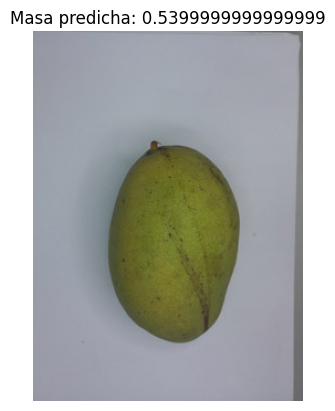

In [51]:
# 1. Cargar una imagen de mango
imagen_mango = cv2.imread("/content/drive/MyDrive/Visión por computadora/Tareas/Actividad_Clase_7/MangoMass/MangoMass/images/100a.jpg")

# 2. Extraer descriptores de la imagen
descriptores_mango = extraer_descriptores(imagen_mango)

# 3. Utilizar el modelo para predecir la masa del mango
masa_predicha = modelo.predict(descriptores_mango.reshape(1, -1))

# 4. Mostrar la imagen junto con la predicción de masa
plt.imshow(cv2.cvtColor(imagen_mango, cv2.COLOR_BGR2RGB))
plt.title(f'Masa predicha: {masa_predicha[0]}')
plt.axis('off')
plt.show()
